由于zipline计算指标的时候需要用到国债利率曲线数据，所以我们进行整理

首先看一下美国国债的数据格式, 这个格式是我们的目标，我们需要用相同的格式保存一份中国国债数据

In [1]:
import pandas as pd

In [3]:
pd.read_csv("treasury_curves.csv").head()

,Time Period,1month,3month,6month,1year,2year,3year,5year,7year,10year,20year,30year
0,1990-12-19 00:00:00+00:00,NaN,0.0683,0.0691,0.0689,0.0721,0.0737,0.0764,0.0792,0.0800,NaN,0.0819
1,1990-12-20 00:00:00+00:00,NaN,0.0675,0.0687,0.0690,0.0725,0.0741,0.0767,0.0796,0.0805,NaN,0.0822
2,1990-12-21 00:00:00+00:00,NaN,0.0679,0.0694,0.0695,0.0730,0.0746,0.0775,0.0803,0.0811,NaN,0.0828
3,1990-12-24 00:00:00+00:00,NaN,0.0673,0.0695,0.0699,0.0735,0.0753,0.0784,0.0812,0.0820,NaN,0.0836
4,1990-12-26 00:00:00+00:00,NaN,0.0668,0.0691,0.0694,0.0727,0.0750,0.0778,0.0807,0.0815,NaN,0.0830


我们的目标就是整理出以上的格式
由于市面上没有免费获取该信息的渠道，所以我们通过搜集公开信息进行整理，经过观察，历史数据可以由中债网站上下载

http://www.chinabond.com.cn/Channel/19051614 

格式为每年一个excel, 我们把它下载下来，并读取保存

In [5]:
data2002 = pd.read_excel("2002年中债国债收益率曲线标准期限信息.xlsx")

In [7]:
data2002.head()

,日期,标准期限说明,标准期限(年),收益率(%)
0,2002-01-04,0d,0.00,2.5132
1,2002-01-04,1m,0.08,2.5192
2,2002-01-04,2m,0.17,2.5252
3,2002-01-04,3m,0.25,2.5312
4,2002-01-04,6m,0.50,2.5492


经观察，格式与我们的目标格式不一致，主要在与期限这边，我们的目标格式是作为多个column ,而我们的源文件是通过row来定义的，这个时候我们需要做一个转化，这个在pandas里叫做透视

In [9]:
data2002.pivot(index='日期', columns='标准期限(年)', values='收益率(%)').head()

标准期限(年),0.0,0.08,0.17,0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,15.0,20.0,30.0
日期,,,,,,,,,,,,,,,,,,,
2002-01-04,2.5132,2.5192,2.5252,2.5312,2.5492,2.5671,2.5850,2.6563,2.7271,2.7975,2.8674,2.9368,3.0057,3.0741,3.1421,3.2096,3.5400,3.8586,4.4600
2002-01-07,2.5315,2.5373,2.5431,2.5489,2.5663,2.5836,2.6009,2.6697,2.7380,2.8057,2.8728,2.9394,3.0055,3.0710,3.1359,3.2003,3.5141,3.8140,4.3724
2002-01-08,1.6574,1.6796,1.7016,1.7235,1.7885,1.8526,1.9156,2.1578,2.3842,2.5946,2.7890,2.9676,3.1302,3.2769,3.4076,3.5225,3.8578,3.7951,2.4752
2002-01-09,1.6275,1.6512,1.6748,1.6983,1.7680,1.8366,1.9040,2.1627,2.4036,2.6266,2.8317,3.0190,3.1884,3.3400,3.4737,3.5896,3.9010,3.7660,2.1569
2002-01-10,1.6239,1.6475,1.6709,1.6942,1.7635,1.8316,1.8987,2.1559,2.3954,2.6173,2.8216,3.0082,3.1772,3.3285,3.4623,3.5784,3.8943,3.7693,2.1966


可以看出，表格被横过来了，但是只有一个excel表的数据，我们写一个小程序，将所有数据合并后在进行透视

In [11]:
# 2002 - 2015

dfs=[]
for i in range(2002, 2016):
    dfs.append(pd.read_excel("%d年中债国债收益率曲线标准期限信息.xlsx" % i))
df = pd.concat(dfs)

result = df.pivot(index='日期', columns='标准期限(年)', values='收益率(%)')

In [15]:
result.sample(5)

标准期限(年),0.0,0.08,0.17,0.25,0.5,0.75,1.0,2.0,3.0,4.0,...,6.0,7.0,8.0,9.0,10.0,15.0,20.0,30.0,40.0,50.0
日期,,,,,,,,,,,,,,,,,,,,,
2007-02-15,1.8540,1.8670,1.8799,1.9200,2.0213,2.0568,2.1500,2.3584,2.5131,2.6451,...,2.8616,2.9627,3.0379,3.0837,3.1365,3.3500,3.4900,3.6350,NaN,NaN
2010-04-06,1.0367,1.1192,1.1917,1.2123,1.4357,1.4985,1.6000,2.0221,2.3338,2.5796,...,3.0218,3.0837,3.1756,3.3448,3.5021,3.8185,4.0023,4.1111,4.1968,4.2719
2007-12-28,1.5680,2.4458,3.1285,3.2600,3.4747,3.5300,3.6732,3.9300,4.0114,4.1193,...,4.2904,4.3365,4.3786,4.4068,4.4357,4.5338,4.7200,4.8200,NaN,NaN
2004-03-04,2.3157,2.3307,2.3458,2.3607,2.4054,2.4496,2.4933,2.6642,2.8282,2.9854,...,3.2795,3.4162,3.5462,3.6694,3.7857,4.2653,4.5745,4.6821,NaN,NaN
2003-07-17,2.3686,2.3745,2.3803,2.3862,2.4037,2.4210,2.4381,2.5049,2.5691,2.6305,...,2.7453,2.7986,2.8492,2.8971,2.9423,3.1278,3.2458,3.2789,NaN,NaN


In [16]:
# 保存之
result.to_csv("all_2012_2015.csv")

这个格式和美国的表格格式略有不同，所以我们简单整理一下

In [23]:
all_china_bond = pd.read_csv('all_2012_2015.csv', parse_dates=['日期'], usecols=('日期', '0.08', '0.25', '0.5', '1.0', '2.0', '3.0', '5.0', '7.0', '10.0', '20.0', '30.0'))
all_china_bond.columns = names=['Time Period', '1month', '3month','6month', '1year', '2year', '3year', '5year', '7year', '10year', '20year', '30year']
all_china_bond.sample(10)


,Time Period,1month,3month,6month,1year,2year,3year,5year,7year,10year,20year,30year
1003,2006-01-16,1.5229,1.5553,1.6036,1.6985,1.8816,2.0560,2.3785,2.6658,3.0311,3.6783,3.4482
50,2002-03-20,2.0182,2.0388,2.0695,2.1299,2.2469,2.3588,2.5676,2.7561,3.0009,3.4881,3.4695
3416,2015-09-09,2.0646,2.2068,2.3059,2.2543,2.6491,2.9902,3.1843,3.3457,3.3478,3.7104,3.8185
3339,2015-05-21,1.9712,2.0998,2.3411,2.4373,2.6416,2.8446,3.1151,3.3874,3.4257,3.9651,4.1251
3273,2015-02-11,3.1630,3.1516,3.0786,3.0928,3.1037,3.1308,3.2856,3.2982,3.3955,3.7819,3.8855
1000,2006-01-11,1.4024,1.4387,1.4927,1.5986,1.8029,1.9968,2.3540,2.6703,3.0678,3.7271,3.3619
147,2002-08-07,1.6461,1.6751,1.7182,1.8029,1.9663,2.1219,2.4093,2.6653,2.9900,3.5600,3.3414
1834,2009-05-13,0.7719,0.8773,0.9299,0.9449,1.1964,1.7233,2.3864,2.7538,3.0365,3.9038,3.9615
2455,2011-11-07,2.7564,2.9583,2.9643,2.9901,3.2544,3.3805,3.5024,3.6382,3.7333,4.0739,4.1945
466,2003-11-24,2.0582,2.0992,2.1598,2.2782,2.5036,2.7136,3.0879,3.4009,3.7557,3.9440,2.6026


ok, 现在就得到了和美国数据相同的格式的数据， 我们报数据保存

In [24]:
all_china_bond.to_csv('china_treasury_curves.csv')

我们还可以针对数据进行绘图

In [26]:
%matplotlib inline

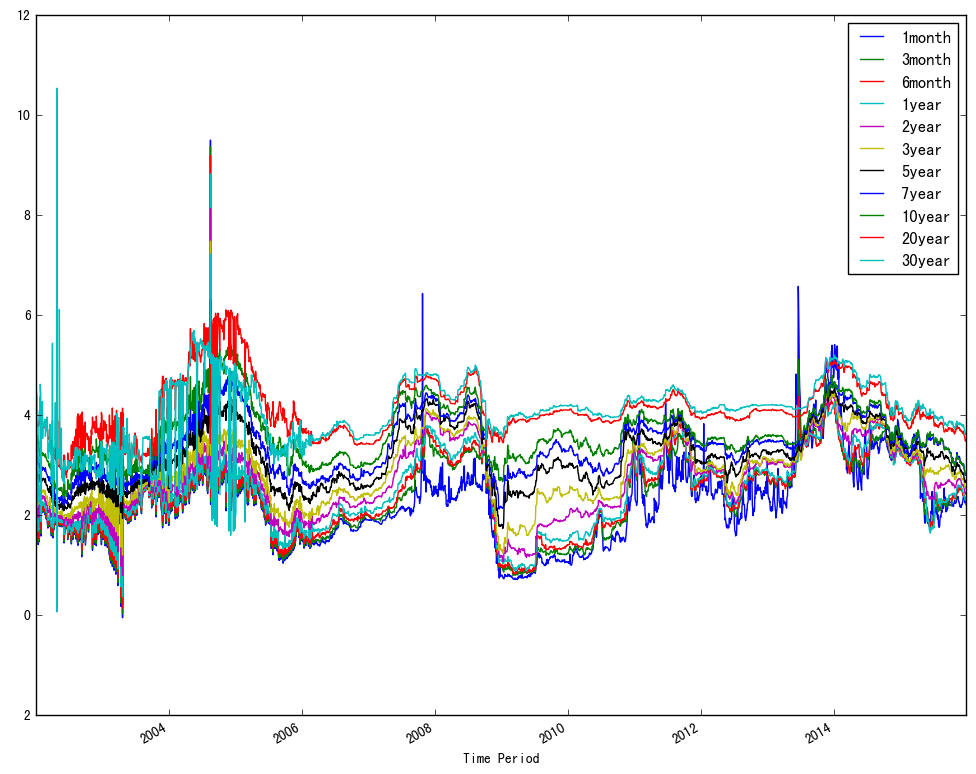

In [29]:
all_china_bond.set_index('Time Period').plot(figsize=(12,10))

由上图看出，有几个时间点的数据波动较大，我们研究一下

In [36]:
all_china_bond.loc[all_china_bond['30year'] < 0.4]

,Time Period,1month,3month,6month,1year,2year,3year,5year,7year,10year,20year,30year
79,2002-04-28,0.8638,0.9323,1.0336,1.2306,1.6026,1.9452,2.542,3.0209,3.5186,3.2634,0.0637


In [35]:
all_china_bond.loc[all_china_bond['30year'] > 10]

,Time Period,1month,3month,6month,1year,2year,3year,5year,7year,10year,20year,30year
77,2002-04-26,4.984,4.8938,4.761,4.5045,4.0282,3.6008,2.8926,2.3799,1.9775,3.8131,10.5366


都是2002年4月左右的30年数据，数据波动很大，具体原因就不得而知了

除此之外，网站还提供了本年数据的下载，格式是相同的，将其下载并合并就可以得到完整数据了，只是需要每天都操作一次
，如 2016年的当年数据下载地址为：
http://yield.chinabond.com.cn/cbweb-mn/yc/downYearBzqx?year=2016&&wrjxCBFlag=0&&zblx=txy